In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf



In [7]:
tf.VERSION

'1.14.0'

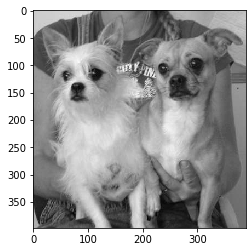

In [40]:
datadir='/home/spider/Videos/cat-and-dog/training_set'
categories=['dogs','cats']

for category in categories:
    path = os.path.join(datadir,category)
    
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        break
    break
        

In [41]:
img_array.shape


(398, 389)

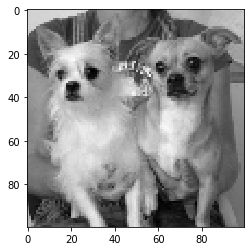

In [42]:
img_size=100
img_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(img_array,cmap='gray')
plt.show()

In [51]:
training_data=[]


def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([img_array,class_num])
            except:
                pass
create_training_data()

In [53]:
len(training_data)

8005

In [54]:
import random
random.shuffle(training_data)

In [75]:
x_train=[]
y_train=[]

for feature,lable in training_data:
    x_train.append(feature)
    y_train.append(lable)

x_train = np.array(x_train).reshape(-1,img_size,img_size,1)
y_train = np.array(y_train).reshape(-1,1)
print(x_train.shape)
print(y_train.shape)


(8005, 100, 100, 1)
(8005, 1)


In [78]:
x_train = tf.keras.utils.normalize(x_train,axis=1)

#there are two types of models
#sequential is most common, why?

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(img_size,img_size)))
#reshape

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=3)

ValueError: Error when checking input: expected flatten_8_input to have 3 dimensions, but got array with shape (8005, 100, 100, 1)